<a href="https://colab.research.google.com/github/Nishaldevadiga/BreastCancerPrediction/blob/main/BreastCancerPred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n", cancer.keys())

cancer.keys(): 
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

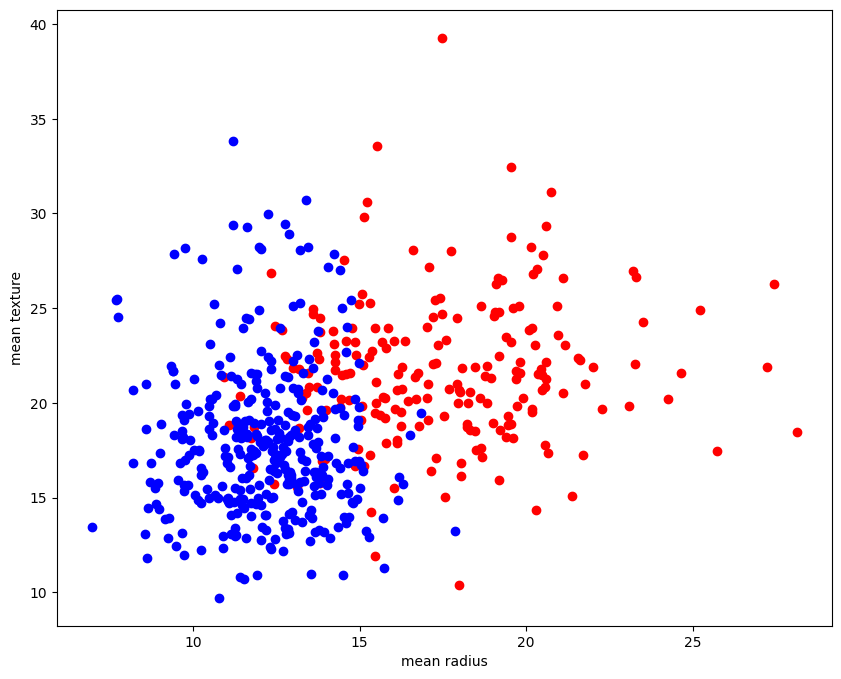

In [5]:
X=[]
for target in range(2):
  X.append([[],[]])
  for i in range(len(cancer.data)):
    #target is 0 or 1
    if cancer.target[i]==target:
      X[target][0].append(cancer.data[i][0])
    #first feature -mean radius
      X[target][1].append(cancer.data[i][1])

    #second feature mean texture
colours=("r","b")  #r:malignant, b:begin
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111)
for target in range(2):
    ax.scatter(X[target][0],X[target][1], c=colours[target])

ax.set_xlabel("mean radius")
ax.set_ylabel("mean texture")
plt.show()

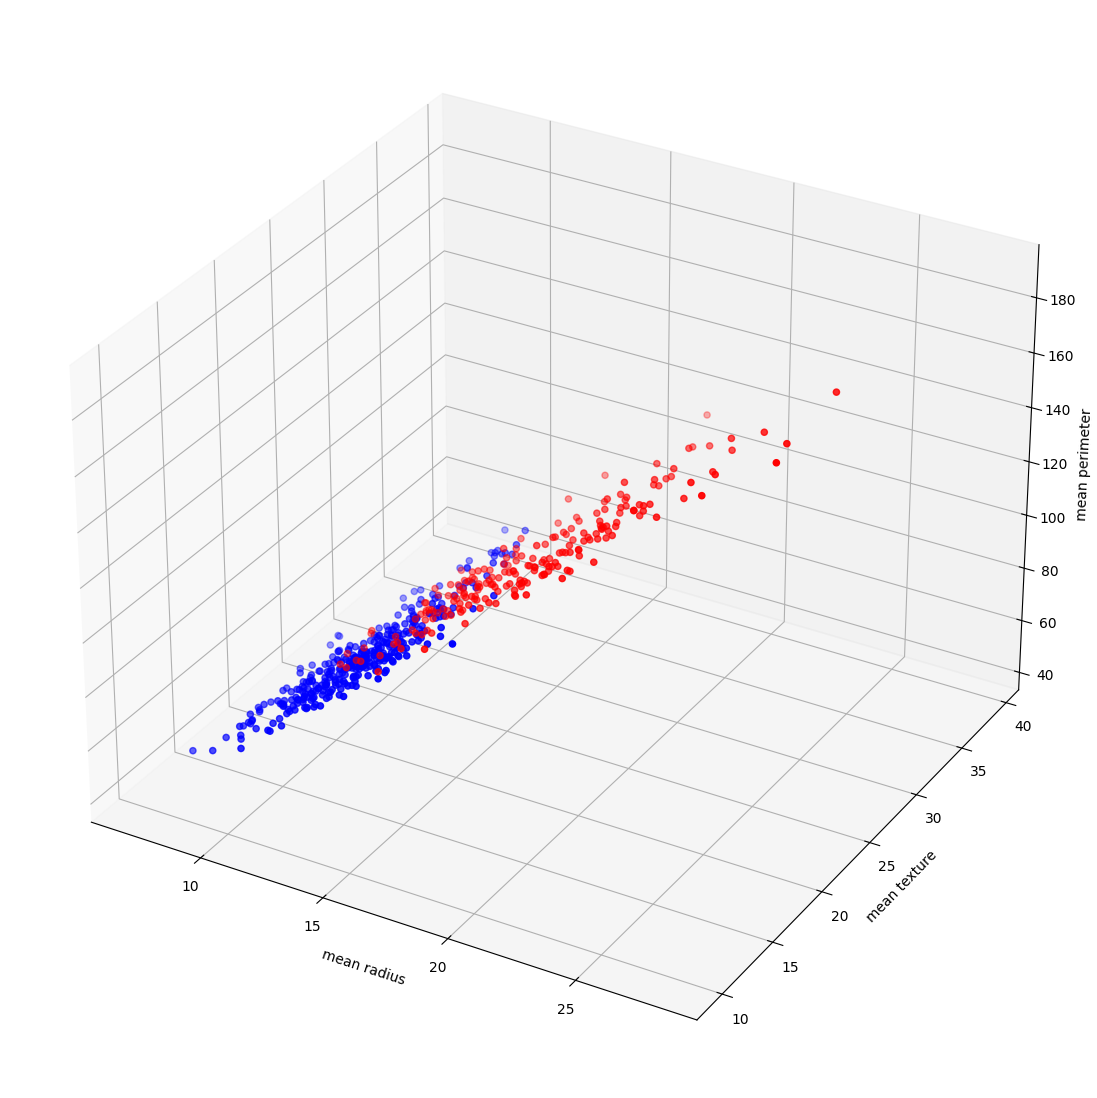

In [6]:
X=[]
for target in range(2):
  X.append([[],[],[]])
  for i in range(len(cancer.data)):
    #target is 0 or 1
    if cancer.target[i]==target:
      X[target][0].append(cancer.data[i][0])
      X[target][1].append(cancer.data[i][1])
      X[target][2].append(cancer.data[i][2])
colors=("r", "b")
fig=plt.figure(figsize=(14,14))
ax=fig.add_subplot(111,projection='3d')
for target in range(2):
  ax.scatter(X[target][0],
             X[target][1],
             X[target][2],
             c=colors[target])
ax.set_xlabel("mean radius")
ax.set_ylabel("mean texture")
ax.set_zlabel("mean perimeter")
plt.show()

<ipython-input-7-782a9b759819>:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x,y,facecolors='none',edgecolors=pd.DataFrame(cancer.target)[0].apply(lambda x:colors[x]),cmap=colors)


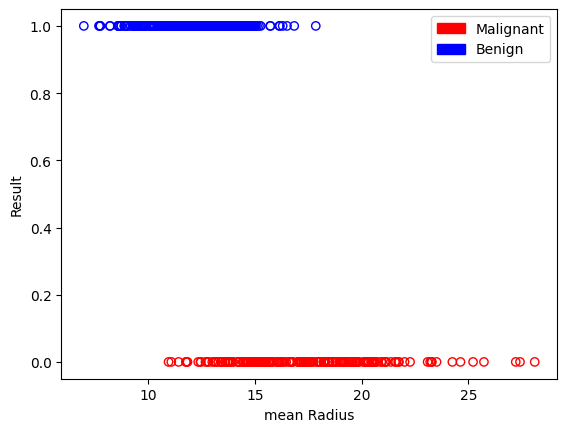

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
x=cancer.data[:,0]
y=cancer.target
colors={0:'red',1:'blue'}
plt.scatter(x,y,facecolors='none',edgecolors=pd.DataFrame(cancer.target)[0].apply(lambda x:colors[x]),cmap=colors)

plt.xlabel("mean Radius")
plt.ylabel("Result")

red=mpatches.Patch(color='red',label='Malignant')
blue=mpatches.Patch(color='blue',label='Benign')
plt.legend(handles=[red,blue])
plt.show()

In [8]:
from sklearn import linear_model
log_r=linear_model.LogisticRegression()


#train the model
log_r.fit(X=np.array(x).reshape(len(x),1),y=y)

print(log_r.intercept_)

print(log_r.coef_)

[15.12718591]
[[-1.02519623]]


<ipython-input-11-3604d86a70c3>:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x,y,facecolors='none',edgecolors=pd.DataFrame(cancer.target)[0].apply(lambda x:colors[x]),cmap=colors)


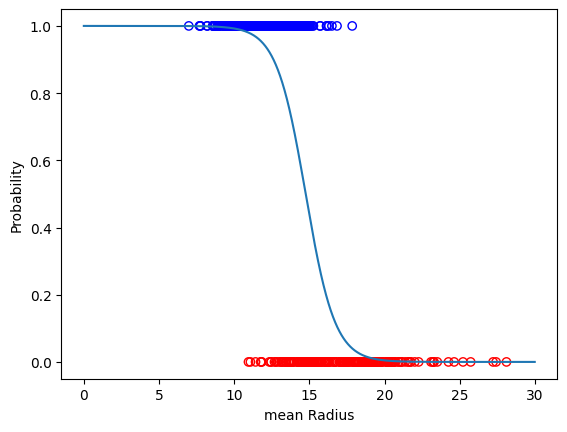

In [11]:
def sigmoid(x):
  return (1/(1+np.exp(-(log_r.intercept_[0]+log_r.coef_[0][0]*x))))

x1=np.arange(0,30,0.01)
y1=[sigmoid(n) for n in x1]

plt.scatter(x,y,facecolors='none',edgecolors=pd.DataFrame(cancer.target)[0].apply(lambda x:colors[x]),cmap=colors)
plt.plot(x1,y1)
plt.xlabel("mean Radius")
plt.ylabel("Probability")
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(cancer.data,cancer.target,test_size=0.25,stratify=cancer.target,random_state=1)

In [15]:
from sklearn import linear_model
x=x_train[:,0:30]
y=y_train

log_r=linear_model.LogisticRegression()
log_r.fit(X=x,y=y)
print(log_r.intercept_)
print(log_r.coef_)



[0.10302742]
[[ 0.58583843  0.52444679  0.51385195 -0.03126476 -0.01615203 -0.09102765
  -0.12902171 -0.05109469 -0.02965605 -0.0043159   0.02724645  0.13819451
   0.02731671 -0.11058877 -0.0014299  -0.02151441 -0.02945436 -0.00684733
  -0.00557213 -0.00205605  0.67824664 -0.57116828 -0.31050649 -0.00666723
  -0.03265654 -0.30802016 -0.38771869 -0.10448578 -0.08826316 -0.02877884]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
pred_prob=pd.DataFrame(log_r.predict_proba(x_test))

In [19]:
pred_prob.columns=["Malignant","Benign"]

In [20]:
preds=log_r.predict(x_test)

In [21]:
preds_class=pd.DataFrame(preds)

In [22]:
preds_class.columns=["Prediction"]

In [25]:
original_result=pd.DataFrame(y_test)
original_result.columns=["Original Result"]

In [27]:
result=pd.concat([pred_prob,preds_class,original_result],axis=1)

In [29]:
result.head()

,Malignant,Benign,Prediction,Original Result
0,0.999835,1.648704e-04,0,0
1,0.999749,2.508993e-04,0,0
2,0.172520,8.274800e-01,1,1
3,1.000000,5.695135e-09,0,0
4,0.089826,9.101744e-01,1,0


In [33]:
print("---Confusion Matrix---")
print(pd.crosstab(y_test,preds))

---Confusion Matrix---
col_0   0   1
row_0        
0      48   5
1       4  86


In [32]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,preds))

[[48  5]
 [ 4 86]]


In [35]:
print("Accuracy")
print(log_r.score(x_test,y_test)*100)

Accuracy
93.7062937062937


In [36]:
print(metrics.classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91        53
           1       0.95      0.96      0.95        90

    accuracy                           0.94       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143

